# モザイクプロット

## 概要

**モザイクプロット（Mosaic Plot）** とは，複数の質的変数に対して，その比率を **長方形の面積** で表したグラフです．
その見た目から **マリメッコプロット（Marimekko Plot）** とも呼ばれます．
分割方法を工夫することで三変数以上にも対応可能ですが，よく見かけるのは二変数に対する描画です．

二変数に対するモザイクプロットは，[積上げ棒グラフ](https://kakeami.github.io/viz-madb/charts4props/bars.html)の棒の太さを，分母の大きさで調整したものと捉えることができます．
これにより，二変数を跨いだ（他の棒中の要素との）比較が可能になりますが，目視で面積を測るのは難しい場合があるので，数値を付記すると親切です．

![](../figs/charts/mosaic.png)

例えば上記は，雑誌別・年代別の作品数の比率を表したモザイクプロットです．
年代ごとの合計作品数に応じて，縦方向の棒の太さが変わっていることがわかります．

## Plotlyによる作図方法

Plotlyで直接モザイクプロットを描画する方法はありません．
[こちら](https://plotly.com/python/bar-charts/)を参考に，棒グラフを応用して作図します．
非常に複雑なので，以下の作図例にコメントを入れる形で解説します．

## MADB Labを用いた作図例

### 下準備

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 前処理の結果，以下に分析対象ファイルが格納されていることを想定
PATH_DATA = '../../data/preprocess/out/episodes.csv'
# Jupyter Book用のPlotlyのrenderer
RENDERER = 'plotly_mimetype+notebook'

In [3]:
def add_years_to_df(df, unit_years=10):
    """unit_years単位で区切ったyears列を追加"""
    df_new = df.copy()
    df_new['years'] = \
        pd.to_datetime(df['datePublished']).dt.year \
        // unit_years * unit_years
    df_new['years'] = df_new['years'].astype(str)
    return df_new

In [4]:
def show_fig(fig):
    """Jupyter Bookでも表示可能なようRendererを指定"""
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.show(renderer=RENDERER)

In [5]:
df = pd.read_csv(PATH_DATA)

### 雑誌別・年代別の合計作品数

In [6]:
col_count = 'cname'

In [7]:
# 10年単位で区切ったyearsを追加
df = add_years_to_df(df, 10)
# mcname, yearsで集計
df_plot = \
    df.groupby(['mcname', 'years'])[col_count].\
    nunique().reset_index()
# years単位で集計してdf_plotにカラムを追加
df_tmp = df_plot.groupby('years')[col_count].sum().reset_index(
    name='years_total')
df_plot = pd.merge(df_plot, df_tmp, how='left', on='years')
# years合計あたりの比率を計算
# 棒グラフの太さを調整する際に利用する
df_plot['ratio'] = df_plot[col_count] / df_plot['years_total']

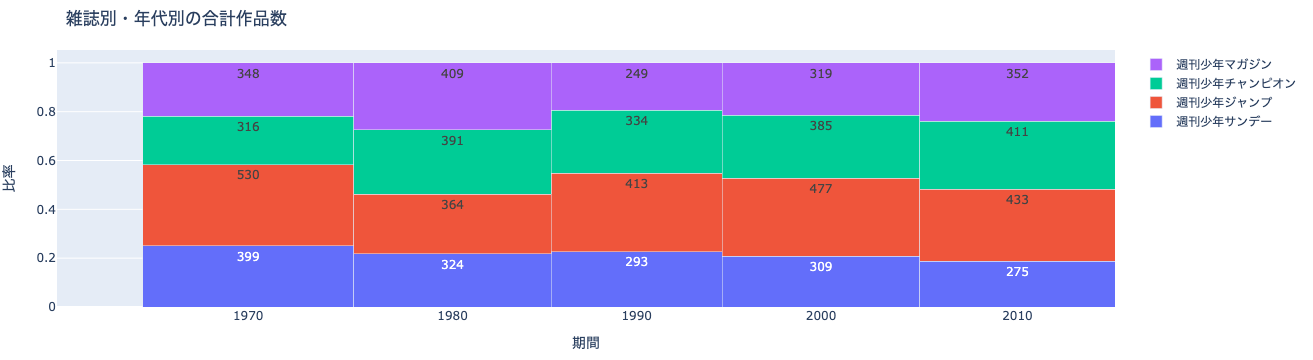

In [8]:
fig = go.Figure()
for mcname in df_plot['mcname'].unique():
    df_tmp = \
        df_plot[df_plot['mcname']==mcname].reset_index(drop=True)
    widths = df_tmp['years_total']
    fig.add_trace(go.Bar(
        name=mcname,
        # X軸方向の位置を，棒グラフの太さを考慮して調整
        x=df_tmp['years_total'].cumsum() - widths,
        y=df_tmp['ratio'], text=df_tmp[col_count],
        # 棒グラフの太さを調整
        width=widths,
        offset=0,))
fig.update_xaxes(
    # X軸の目盛りの位置を，棒グラフの太さを考慮して調整
    tickvals=widths.cumsum() - widths/2,
    ticktext=df_plot['years'].unique(),)
fig.update_xaxes(title='期間')
fig.update_yaxes(title='比率')
# go.Barを積み上げる設定
fig.update_layout(barmode='stack', title_text='雑誌別・年代別の合計作品数')
show_fig(fig)    

### 雑誌別・年代別の合計作家数

In [11]:
col_count = 'creator'

In [12]:
# 10年単位で区切ったyearsを追加
df = add_years_to_df(df, 10)
# mcname, yearsで集計
df_plot = \
    df.groupby(['mcname', 'years'])[col_count].\
    nunique().reset_index()
# years単位で集計してdf_plotにカラムを追加
df_tmp = df_plot.groupby('years')[col_count].sum().reset_index(
    name='years_total')
df_plot = pd.merge(df_plot, df_tmp, how='left', on='years')
# years合計あたりの比率を計算
# 棒グラフの太さを調整する際に利用
df_plot['ratio'] = df_plot[col_count] / df_plot['years_total']

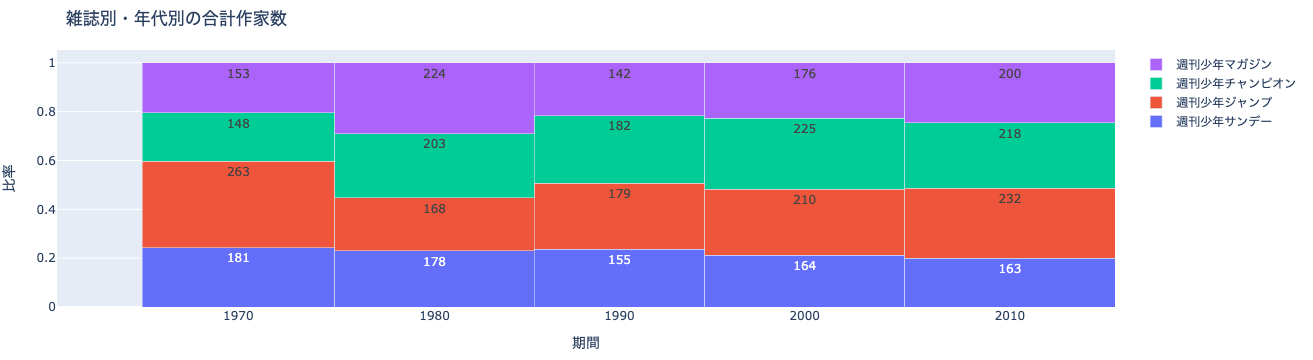

In [13]:
fig = go.Figure()
for mcname in df_plot['mcname'].unique():
    df_tmp = \
        df_plot[df_plot['mcname']==mcname].reset_index(drop=True)
    widths = df_tmp['years_total']
    fig.add_trace(go.Bar(
        name=mcname,
        # 棒グラフの太さを考慮してX軸方向の位置を調整
        x=df_tmp['years_total'].cumsum() - widths,
        y=df_tmp['ratio'], text=df_tmp[col_count],
        # 棒グラフの太さを調整
        width=widths,
        offset=0,))
fig.update_xaxes(
    # 棒グラフの太さを考慮してX軸の目盛りの位置を調整
    tickvals=widths.cumsum() - widths/2,
    ticktext=df_plot['years'].unique(),)
fig.update_xaxes(title='期間')
fig.update_yaxes(title='比率')
# go.Bar()を積み上げる設定
fig.update_layout(
    barmode='stack', title_text='雑誌別・年代別の合計作家数')
show_fig(fig)    